<a href="https://colab.research.google.com/github/SonuDash/SolSat/blob/main/SolSat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SolSat
## Normalisation of the given dataset

In [76]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
from sklearn import preprocessing

In [77]:
# Path to your CSV file
magdata = 'kyotodataset.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(magdata)


In [78]:
print(df.head())

   TIME  Magnetic field in nT
0     1                    14
1     2                    13
2     3                    12
3     4                    10
4     5                     5


## Finding Out Kp Index

In [79]:
df['Magnetic field in nT'][0:3].sum()/3

13.0

In [80]:
df['Magnetic field in nT'].sum()/24

7.75

In [81]:
df['Sliding Window Avg'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df

,TIME,Magnetic field in nT,Sliding Window Avg
0,1,14,0
1,2,13,0
2,3,12,0
3,4,10,0
4,5,5,0
5,6,6,0
6,7,4,0
7,8,3,0
8,9,4,0
9,10,7,0




### Step1: Take the average of 3 inputs at a time

In [82]:
j = 0
for i in range(0,df['TIME'].max()): #0 to 24 -> with increaments of 3
  df['Sliding Window Avg'][j:j+3] = df['Magnetic field in nT'][i:i+3].sum()/3
  j += 3

In [83]:
df

,TIME,Magnetic field in nT,Sliding Window Avg
0,1,14,13.000000
1,2,13,13.000000
2,3,12,13.000000
3,4,10,11.666667
4,5,5,11.666667
5,6,6,11.666667
6,7,4,9.000000
7,8,3,9.000000
8,9,4,9.000000
9,10,7,7.000000


### Month of the year

In [131]:
current_date = datetime.now()
curr_month = current_date.month
print(curr_month)

# # mannually over-riding curr_month value

# curr_month = 10

3


### Hour of the Year

In [132]:
current_datetime = datetime.now()
curr_hour = current_datetime.hour
print(curr_hour)

9


In [133]:
df['Local Kp index'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [134]:
df['TIME'].max()

24

## Month separation

In [135]:
# for winter
if curr_month == 1 or curr_month == 2 or curr_month == 11 or curr_month == 12:
  for j in df['TIME']:
    i = j-1

    # 1st Count
    if j>=1 and j<=3:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <5:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=5 and df['Sliding Window Avg'][i] <8:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=8 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <13:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=13 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <25:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=25 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #2nd Count
    elif j>=4 and j<=6:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <26:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=26 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #3rd Count
    elif j>=7 and j<=9:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <5:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=5 and df['Sliding Window Avg'][i] <8:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=8 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <20:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=20 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <26:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=26 and df['Sliding Window Avg'][i] <27:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=27 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #4th Count
    elif j>=10 and j<=12:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <8:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=8 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=26 and df['Sliding Window Avg'][i] <27:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=27 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #5th Count
    elif j>=13 and j<=15:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <11:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=11 and df['Sliding Window Avg'][i] <13:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=13 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <25:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=25 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #6th Count
    elif j>=16 and j<=18:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <14:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=14 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #7th Count
    elif j>=19 and j<=21:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <8:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=8 and df['Sliding Window Avg'][i] <11:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=11 and df['Sliding Window Avg'][i] <13:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=13 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #8th Count
    elif j>=22 and j<=24:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <20:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=20 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

################################################################################
# for equinox
elif curr_month == 3 or curr_month == 4 or curr_month == 9 or curr_month == 10:
  for j in df['TIME']:
    i = j-1
    # 1st Count
    if j>=1 and j<=3:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <5:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=5 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <14:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=14 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #2nd Count
    elif j>=4 and j<=6:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <5:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=5 and df['Sliding Window Avg'][i] <8:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=8 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <20:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=20 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <26:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=26 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #3rd Count
    elif j>=7 and j<=9:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <3:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=3 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <11:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=11 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <25:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=25 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #4th Count
    elif j>=10 and j<=12:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <14:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=14 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #5th Count
    elif j>=13 and j<=15:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <13:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=13 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #6th Count
    elif j>=16 and j<=18:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <13:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=13 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #7th Count
    elif j>=19 and j<=21:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <14:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=14 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #8th Count
    elif j>=22 and j<=24:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9


################################################################################
# for summer
else:
  for j in df['TIME']:
    i = j-1
    # 1st Count
    if j>=1 and j<=3:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <13:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=13 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <25:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=25 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #2nd Count
    elif j>=4 and j<=6:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <11:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=11 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <21:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=21 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <26:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=26 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #3rd Count
    elif j>=7 and j<=9:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=6 and df['Sliding Window Avg'][i] <11:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=11 and df['Sliding Window Avg'][i] <15:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=15 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <26:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=26 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #4th Count
    elif j>=10 and j<=12:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <3:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=3 and df['Sliding Window Avg'][i] <5:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=5 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <14:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=14 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <23:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=23 and df['Sliding Window Avg'][i] <25:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=25 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #5th Count
    elif j>=13 and j<=15:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <3:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=3 and df['Sliding Window Avg'][i] <5:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=5 and df['Sliding Window Avg'][i] <8:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=8 and df['Sliding Window Avg'][i] <11:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=11 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <18:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=18 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #6th Count
    elif j>=16 and j<=18:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <3:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <6:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <9:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=9 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #7th Count
    elif j>=19 and j<=21:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <16:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=16 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9

    #8th Count
    elif j>=22 and j<=24:
      if df['Sliding Window Avg'][i] < 1:
        df['Local Kp index'][i] = 0
      elif df['Sliding Window Avg'][i] >=1 and df['Sliding Window Avg'][i] <4:
        df['Local Kp index'][i] = 1
      elif df['Sliding Window Avg'][i] >=4 and df['Sliding Window Avg'][i] <7:
        df['Local Kp index'][i] = 2
      elif df['Sliding Window Avg'][i] >=7 and df['Sliding Window Avg'][i] <10:
        df['Local Kp index'][i] = 3
      elif df['Sliding Window Avg'][i] >=10 and df['Sliding Window Avg'][i] <12:
        df['Local Kp index'][i] = 4
      elif df['Sliding Window Avg'][i] >=12 and df['Sliding Window Avg'][i] <17:
        df['Local Kp index'][i] = 5
      elif df['Sliding Window Avg'][i] >=17 and df['Sliding Window Avg'][i] <19:
        df['Local Kp index'][i] = 6
      elif df['Sliding Window Avg'][i] >=19 and df['Sliding Window Avg'][i] <22:
        df['Local Kp index'][i] = 7
      elif df['Sliding Window Avg'][i] >=22 and df['Sliding Window Avg'][i] <24:
        df['Local Kp index'][i] = 8
      elif df['Sliding Window Avg'][i] >=24 and df['Sliding Window Avg'][i] <28:
        df['Local Kp index'][i] = 9


df

<ipython-input-135-4f11f80eeedd>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Local Kp index'][i] = 4
<ipython-input-135-4f11f80eeedd>:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Local Kp index'][i] = 3
<ipython-input-135-4f11f80eeedd>:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Local Kp index'][i] = 3
<ipython-input-135-4f11f80eeedd>:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,TIME,Magnetic field in nT,Sliding Window Avg,Local Kp index
0,1,14,13.000000,4
1,2,13,13.000000,4
2,3,12,13.000000,4
3,4,10,11.666667,3
4,5,5,11.666667,3
5,6,6,11.666667,3
6,7,4,9.000000,3
7,8,3,9.000000,3
8,9,4,9.000000,3
9,10,7,7.000000,3


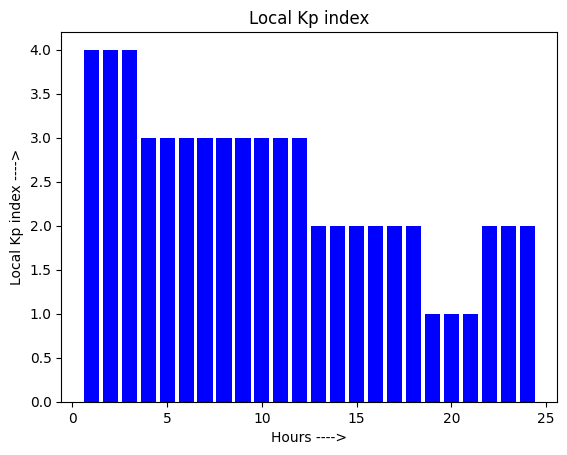

In [136]:
import pandas as pd
import matplotlib.pyplot as plt


# Replace 'parameter1' and 'parameter2' with the actual column names you want to plot
parameter1_values = df['TIME']
parameter2_values = df['Local Kp index']

# Create a bar graph
plt.bar(parameter1_values, parameter2_values, color='blue')

# Customize the plot (add labels, title, etc.)
plt.xlabel('Hours ---->')
plt.ylabel('Local Kp index ---->')
plt.title('Local Kp index')

# Show the plot
plt.show()
